# Will's Take on the BDU Classification Dataset

Hello! I decided to try to recreate some of the results we got at the last BDU meet-up (Classification with Python on April 25th). I was able to get a slightly better test score with the SVM classifier: 77.5%. Funnily enough, this improvement came after playing around with the features and dropping both **principal** and **terms**. My work is as follows.

If anyone has any comments, questions, or suggestions, please feel free to email me at willbarker1995@gmail.com

## Load the Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import NullFormatter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loans = pd.read_csv("LoanPaymentsDataClean.csv")
loans.head()

,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Unnamed: 0        400 non-null int64
loan_status       400 non-null object
Principal         400 non-null int64
terms             400 non-null int64
effective_date    400 non-null object
due_date          400 non-null object
age               400 non-null int64
education         400 non-null object
Gender            400 non-null object
dtypes: int64(4), object(5)
memory usage: 28.2+ KB


In [4]:
loans.describe()

,Unnamed: 0,Principal,terms,age
count,400.000000,400.00000,400.000000,400.000000
mean,199.500000,939.75000,22.550000,31.060000
std,115.614301,120.33761,8.100094,6.033441
min,0.000000,300.00000,7.000000,18.000000
25%,99.750000,800.00000,15.000000,27.000000
50%,199.500000,1000.00000,30.000000,30.000000
75%,299.250000,1000.00000,30.000000,35.000000
max,399.000000,1000.00000,30.000000,51.000000


Some takeaways:
- Majority of the Principal amounts seem to be \$1000. Median to third quartile are \$1000, and the mean is \$939.75
- Max terms for a loan is a month
- Unnamed: 0 seems to just be an index


In [5]:
loans["loan_status"].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

**loan_status** is the target value which we are trying to predict.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FAB43F400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020FAE1515C0>]], dtype=object)

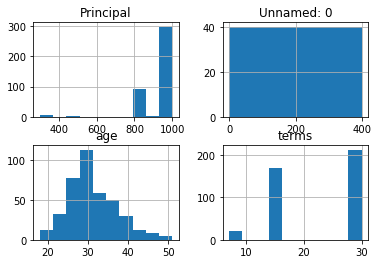

In [6]:
loans.hist()

In [7]:
loans["Unnamed: 0"].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

The attribute **Unnamed: 0** doesn't seem to do provide any useful information to the data; just seems to be an unnecessary index. Let's get rid of it:

In [8]:
loans.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
loans.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


## Explore the Data and Visualize New Insights

I'm going to use the nifty plotting functions that were created in the original classification notebook:

In [10]:
def NiceHist(Name,df,H=False):
    #plt.hist([df.ix[df['loan_status']=='PAIDOFF',Name],df.ix[df['loan_status']=='COLLECTION',Name]],stacked=True,alpha=0.5,label=['PAIDOFF', 'COLLECTION']) 
    Paid=df.ix[df['loan_status']=='PAIDOFF',Name].values
    notPaid=df.ix[df['loan_status']=='COLLECTION',Name].values
    Max=np.array([Paid.max(),notPaid.max()]).max()
    Min=np.array([Paid.min(),notPaid.min()]).min()
    bins = np.linspace(Min, Max,10)
   
    

    plt.hist(Paid, bins, alpha=0.5, label='PAIDOFF',color='g')
    plt.hist(notPaid, bins, alpha=0.5, label='COLLECTION',color='r')
    plt.legend(loc='upper left')
    plt.xlabel(Name)
    plt.title('Histogram of '+Name+ ' for Different Classes' )
    plt.ylabel('Number of people')
    plt.show()
        

        
def CoolPlot(df,Name_x,Name_y):       # no labels
    nullfmt = NullFormatter()   
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

   # nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    whatcolor=df['loan_status'].apply(lambda x: 'g' if x=='PAIDOFF' else 'r' )

    axScatter.scatter(df[Name_x], df[Name_y],c=whatcolor,marker=(5, 0)) 
    axScatter.set_xlabel(Name_x)
    axScatter.set_ylabel(Name_y)
    
    Paid_x=df.ix[df['loan_status']=='PAIDOFF',Name_x].values
    notPaid_x=df.ix[df['loan_status']=='COLLECTION',Name_x].values
    Max_x=np.array([Paid_x.max(),notPaid_x.max()]).max()
    Min_x=np.array([Paid_x.min(),notPaid_x.min()]).min()
    bins_x = np.linspace(Min_x, Max_x,10)

    axHistx.hist(Paid_x, bins_x, alpha=0.5, label='PAIDOFF',color='g')
    axHistx.hist(notPaid_x, bins_x, alpha=0.5, label='COLLECTION',color='r')
    axHistx.legend(loc='upper left')


    Paid_y=df.ix[df['loan_status']=='PAIDOFF',Name_y].values
    notPaid_y=df.ix[df['loan_status']=='COLLECTION',Name_y].values
    Max_y=np.array([Paid_y.max(),notPaid_y.max()]).max()
    Min_y=np.array([Paid_y.min(),notPaid_y.min()]).min()
    bins_y = np.linspace(Min_y, Max_y,10)
    axHisty.hist(Paid_y, bins_y, alpha=0.5, label='PAIDOFF',color='g', orientation='horizontal')
    axHisty.hist(notPaid_y, bins_y, alpha=0.5, label='COLLECTION',color='r', orientation='horizontal')

    


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Let's examine a few attributes and their impact on **loan_status**

### Age

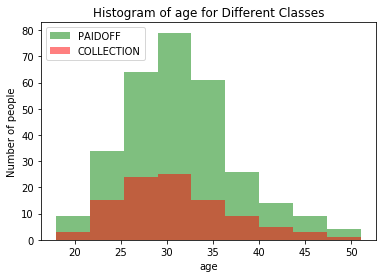

In [11]:
NiceHist('age', loans)

Looking at this, it's important to remember that the dataset had much more people who have paid off their loans than those who haven't. With this in mind, we can see that age isn't a huge factor in whether someone will go to collection or not; the bars seem to rise and fall similarly for both PAIDOFF and COLLECTION in the age distribution.

### Principal

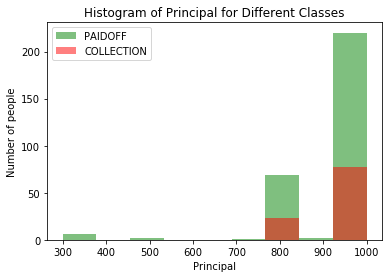

In [12]:
NiceHist('Principal', loans)

We see that in this dataset, everyone who has taken a loan less than $800 has paid it off no problem. But as the loans get bigger, a portion of borrowers (<50%) start going into collection. This would make sense as it can be harder to come up with larger amounts of money in the timeframe specified by the loan terms.

### Terms

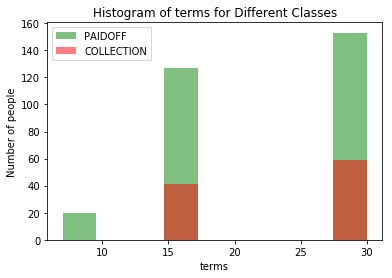

In [13]:
NiceHist('terms', loans)

With terms, we see that the more time people are given to repay, the less likely they are to do so. This might have to do with larger sized loans being given larger term periods. Let's explore that relationship using the nifty **CoolPlot** function:

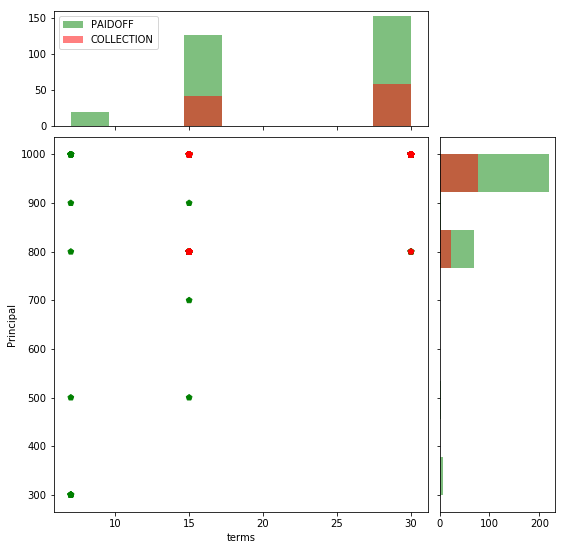

In [14]:
CoolPlot(loans, 'terms', 'Principal')

### Gender

In [15]:
loans.groupby(['Gender'])["loan_status"].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

Women are more likely to pay off their loans then men!

### Day of the Week

Let's start by converting both **effective_date** and **due_date** to Pandas DateTime objects:

In [16]:
loans["effective_date"] = pd.to_datetime(loans["effective_date"])
loans["due_date"] = pd.to_datetime(loans["due_date"])
loans.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female


In [17]:
loans["day_of_week"] = loans["effective_date"].dt.dayofweek

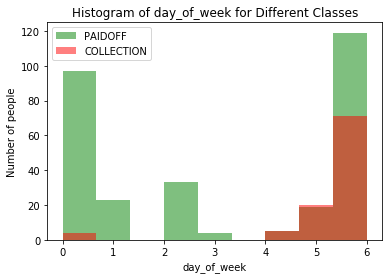

In [18]:
NiceHist("day_of_week", loans)

The day the loan is taken out has a huge impact on whether it gets paid or not. The later in the week that it's taken out, the less likely it'll get repaid. As we discussed during the demo, people might be taking out these loans to go out and have a nice time on the weekend!

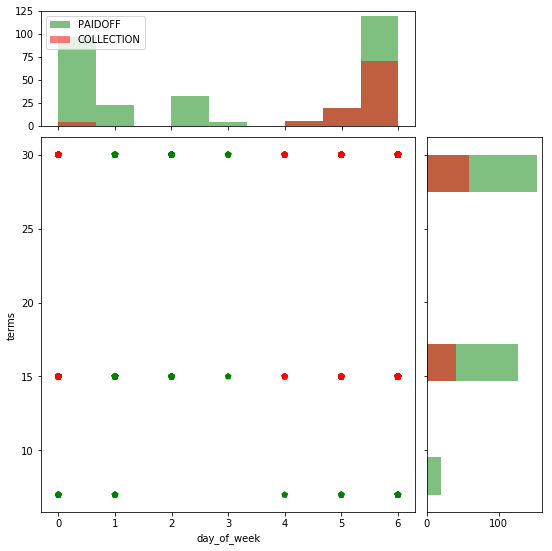

In [19]:
CoolPlot(loans, "day_of_week", "terms")

It seems that loans given out close to the weekend with smaller terms don't get repaid! Since it seems to matter whether a loan is granted close to the weekend or not, we can add a binary feature saying if its close to the weekend or not:

In [20]:
loans["weekend"] = loans["day_of_week"].apply(lambda x: 1 if (x>3) else 0)
loans.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1


### Day of Month

What about the day of the month? Does that have any impact?

In [21]:
loans["day_of_month"] = loans["effective_date"].dt.day

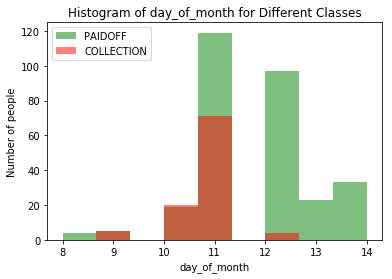

In [22]:
NiceHist("day_of_month", loans)

In [23]:
loans["day_of_month"].unique()

array([ 8,  9, 10, 11, 12, 13, 14], dtype=int64)

If you take a loan out on the 11th, there's a very good chance you're not going to pay it back! This dataset only has loans taken from a small range of days (8-14).

### Months

Just for fun, let's see if the month that a loan is taken out has any impact on its repayment. Desperate holiday loans??

In [24]:
loans["month"] = loans["effective_date"].dt.month

In [25]:
loans["month"].describe()

count    400.0
mean       9.0
std        0.0
min        9.0
25%        9.0
50%        9.0
75%        9.0
max        9.0
Name: month, dtype: float64

Seems like all the loans in this dataset were given in September. Never mind!

In [26]:
loans.drop(["month"], axis=1, inplace=True)

## Clean and Prepare the Data

### Deal with Text Attributes

First things first: let's get rid of all the text!

In [27]:
loans.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week,weekend,day_of_month
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,8
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0,8
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,8
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,8
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,9


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
loan_encoder = LabelEncoder()
loan_cat = loans["loan_status"]
loan_cat_encoded = loan_encoder.fit_transform(loan_cat)
loans["loan_status"] = loan_cat_encoded
print(loan_encoder.classes_)

['COLLECTION' 'PAIDOFF']


In [30]:
gender_encoder = LabelEncoder()
gender_cat = loans["Gender"]
gender_cat_encoded = gender_encoder.fit_transform(gender_cat)
loans["Gender"] = gender_cat_encoded
print(gender_encoder.classes_)

['female' 'male']


In [31]:
loans.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week,weekend,day_of_month
0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0,8
1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,0,3,0,8
2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0,8
3,1,1000,15,2016-09-08,2016-09-22,27,college,1,3,0,8
4,1,1000,30,2016-09-09,2016-10-08,28,college,0,4,1,9


For education, we're going to have to do one-hot encoding. This is because the values for education aren't *nominal* like loan_status or gender (i.e., labels with no way of ranking them). Education's values are *ordinal*; they can be ranked. It would be fair to say that in terms of desirability in giving out loans, education, ranked from least to most desirable, could be arranged like this:

High School or Below, College, Bachelor, Masters or Above.

Speaking generally, it's more likely that someone in college is more likely to have a higher paying job than someone with just a high school eduction, and would have the funds/stability to pay back the loan.

Let's see the distribution of education in the dataset:

In [32]:
loans["education"].value_counts()/len(loans)

college                 0.43
High School or Below    0.43
Bechalor                0.13
Master or Above         0.01
Name: education, dtype: float64

Only 1% of the dataset has an education at a Masters level or above, so we'll get rid of it after the one-hot to reduce the dimensionality of the data.

In [33]:
loans=pd.concat([loans,pd.get_dummies(loans['education'])], axis=1)

loans = loans[['loan_status', 'age', 'Gender', 'day_of_week', 'weekend',
               'day_of_month','Bechalor', 'High School or Below', 'college']]


# principal, terms
loans.head()

,loan_status,age,Gender,day_of_week,weekend,day_of_month,Bechalor,High School or Below,college
0,1,45,1,3,0,8,0,1,0
1,1,50,0,3,0,8,1,0,0
2,1,33,0,3,0,8,1,0,0
3,1,27,1,3,0,8,0,0,1
4,1,28,0,4,1,9,0,0,1


I've run this notebook many times in order to see what combination of features would generate the greatest results for the SVM classifier I use further down. It turns out, that getting rid of both the **principal** and **terms** attributes seems to help all the classifiers make better predictions! No clue why, but very interesting...

## Make a Test Set

Since this dataset is pretty small (400 examples), it makes sense to go with a stratified train and test sets. This is because is a ratio of 1:3 for loans collected vs paidoff; simply choosing random points to put into train/test could end up with a fairly lopsided sets (likely in the direction of paidoff). We want the train set and test set to be indicative of each other, so there should be a ratio of 1:3 collected to paidoff in each. 

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

In [35]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [36]:
for train_index, test_index in split.split(loans, loans["loan_status"]):
    strat_train_set = loans.loc[train_index]
    strat_test_set = loans.loc[test_index]

In [37]:
print("Training Set")
strat_train_set["loan_status"].value_counts()/len(strat_train_set)

Training Set


1    0.75
0    0.25
Name: loan_status, dtype: float64

In [38]:
print("Test Set")
strat_test_set["loan_status"].value_counts()/len(strat_test_set)

Test Set


1    0.75
0    0.25
Name: loan_status, dtype: float64

## Separate Targets and Features

In [39]:
train_Y = strat_train_set["loan_status"].values
train_X = strat_train_set[[x for x in strat_train_set.columns if 'loan_status' not in x]]

test_Y = strat_test_set["loan_status"].values
test_X = strat_test_set[[x for x in strat_test_set.columns if 'loan_status' not in x]]

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)
train_X

array([[ 0.29994025, -2.2966301 ,  0.88961241, ...,  2.53808204,
        -0.88753   , -0.83793058],
       [-0.52040916,  0.43542058, -0.64296348, ..., -0.3939983 ,
         1.12672248, -0.83793058],
       [-0.19226939,  0.43542058,  0.50646844, ..., -0.3939983 ,
         1.12672248, -0.83793058],
       ..., 
       [ 0.13587037,  0.43542058,  0.88961241, ..., -0.3939983 ,
         1.12672248, -0.83793058],
       [-0.35633928,  0.43542058,  0.50646844, ..., -0.3939983 ,
         1.12672248, -0.83793058],
       [-0.35633928,  0.43542058, -0.64296348, ..., -0.3939983 ,
        -0.88753   ,  1.19341628]])

## Short List of ML Algos

I'm going to make a function to evaluate the accuracy of our algos' predictions. **no_more_confusion** displays the classifier's results for each category of a confusion matrix, and sums the True Negatives and True Positives to get the Accuracy:

In [43]:
def no_more_confusion(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    a = matrix[0][0]
    b = matrix[0][1]
    c = matrix[1][0]
    d = matrix[1][1]
    total = a + b + c + d
    print('True Negative:', (a/total))
    print('False Positive:', (b/total))
    print('False Negative:', (c/total))
    print('True Positive:', (d/total))
    print('\nAccuracy:', a/total + d/total)

### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [45]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(train_X, train_Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
no_more_confusion(train_Y, knn_5.predict(train_X))

True Negative: 0.1625
False Positive: 0.0875
False Negative: 0.071875
True Positive: 0.678125

Accuracy: 0.840625


84% accuracy! That's pretty good!

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg = LogisticRegression()
log_reg.fit(train_X, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
no_more_confusion(train_Y, log_reg.predict(train_X))

True Negative: 0.03125
False Positive: 0.21875
False Negative: 0.0375
True Positive: 0.7125

Accuracy: 0.74375


### Support Vector Machine

In [50]:
from sklearn import svm 

In [51]:
svm_basic = svm.SVC(gamma=0.1,C=1)
svm_basic.fit(train_X, train_Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
no_more_confusion(train_Y, svm_basic.predict(train_X))

True Negative: 0.025
False Positive: 0.225
False Negative: 0.00625
True Positive: 0.74375

Accuracy: 0.76875


## Fine-Tune the SVM

I'm going to use scikit-learn's **GridSearchCV** function to test out a bunch of hyperparameter combinations for the SVM classifier. It breaks the training set into validation sets and tests the model against different combinations of those sets (folds):

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = [
    {'kernel': ['rbf'], 'gamma': [0.001,0.001,0.1,1,10], 'C': [0.01,0.1,1,10]},
    {'kernel': ['linear'], 'gamma': [0.001,0.001,0.1,1,10], 'C': [0.01,0.1,1,10]},
        ]


svm_algo = svm.SVC()

grid_search = GridSearchCV(svm_algo, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(train_X, train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.001, 0.1, 1, 10], 'C': [0.01, 0.1, 1, 10]}, {'kernel': ['linear'], 'gamma': [0.001, 0.001, 0.1, 1, 10], 'C': [0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [55]:
grid_search.best_score_

0.75937500000000002

We can see the scores of each hyperparameter combination:

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.75 {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.75 {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.75 {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.75 {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.75 {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.75 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.75 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.75 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.75 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.75 {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.75 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.75 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.753125 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.759375 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.73125 {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.75 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.75 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.746875 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.740625 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.7375 {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.75 {'C': 0.01, 'gamma': 0.001, 'kernel': 'l

In [57]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
no_more_confusion(train_Y, grid_search.best_estimator_.predict(train_X))

True Negative: 0.084375
False Positive: 0.165625
False Negative: 0.021875
True Positive: 0.728125

Accuracy: 0.8125


The optimal hyperparameters get a 81% on the entire training set - pretty good!

## Final Prediction on the Test Set

In [59]:
final_model = grid_search.best_estimator_

In [60]:
final_predictions = final_model.predict(test_X)

In [61]:
no_more_confusion(test_Y, final_predictions)

True Negative: 0.05
False Positive: 0.2
False Negative: 0.025
True Positive: 0.725

Accuracy: 0.775


77.5% accuracy! Not bad! For good measure, let's also try our KNN classifer (which scored 84% on the training) on the test set:

In [62]:
knn_final_predictions = knn_5.predict(test_X)

In [63]:
no_more_confusion(test_Y, knn_final_predictions)

True Negative: 0.075
False Positive: 0.175
False Negative: 0.1
True Positive: 0.65

Accuracy: 0.725


Now KNN doesn't look as good as it was before. It was overfitting the training data; doing a grid search for the optimal hyperparameters might help bring the score up, but for the time being I'll stop this notebook here.

If anyone has any questions about how I got some of these results, feel free to send me an email at: willbarker1995@gmail.com.

Thanks for reading through! Hope to see everyone again at the next BDU meet-up!